Contours : More Functions
===
Goal
---
**In this chapter, we will learn about**

- Convexity defects and how to find them.
- Finding shortest distance from a point to a polygon
- Matching different shapes
Theory and Code
---
1. Convexity Defects
---
We saw what is convex hull in second chapter about contours. Any deviation of the object from this hull can be considered as convexity defect.

OpenCV comes with a ready-made function to find this, `cv2.convexityDefects()`. A basic function call would look like below:

    hull = cv2.convexHull(cnt,returnPoints = False)
    defects = cv2.convexityDefects(cnt,hull)


It returns an array where each row contains these values - **[ start point, end point, farthest point, approximate distance to farthest point ]**. We can visualize it using an image. We draw a line joining start point and end point, then draw a circle at the farthest point. Remember first three values returned are indices of `cnt`. So we have to bring those values from `cnt`.

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


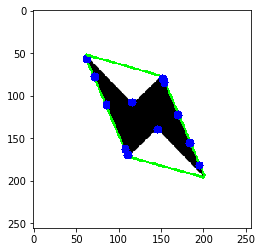

In [3]:
%pylab inline

import cv2
import numpy as np

img = cv2.imread('images/lightning.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255,0)
imgout, contours,hierarchy = cv2.findContours(thresh,2,1)
cnt = contours[1]
hull = cv2.convexHull(cnt.copy(),returnPoints = False)
defects =cv2.convexityDefects(cnt.copy(),hull)
for i in range(defects.shape[0]):
    s,e,fe,de = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[fe][0])
    cv2.line(img,start,end,(0,255,0),2)
    cv2.circle(img,far,5,(0,0,255),-1)

imshow(img)


2. Point Polygon Test
---
This function finds the shortest distance between a point in the image and a contour. It returns the distance which is negative when point is outside the contour, positive when point is inside and zero if point is on the contour.

For example, we can check the point (50,50) as follows:

In [56]:
dist = cv2.pointPolygonTest(cnt,(50,50),True)
print ("Distance: " + str(dist))

Distance: -11.401754251


In the function, third argument is 'measureDist'. If it is True, it finds the signed distance. If False, it finds whether the point is inside or outside or on the contour (it returns +1, -1, 0 respectively).

3. Match Shapes
---
OpenCV comes with a function `cv2.matchShapes()` which enables us to compare two shapes, or two contours and returns a metric showing the similarity. The lower the result, the better match it is. It is calculated based on the hu-moment values. Different measurement methods are explained in the docs.

0.5129822989189228
0.8994529947693057


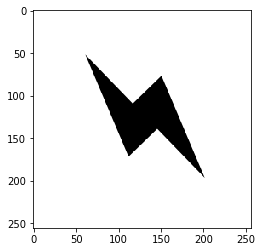

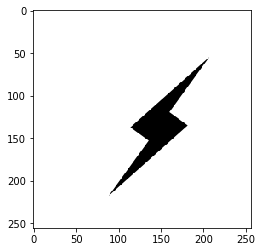

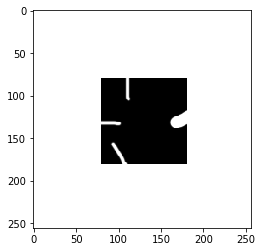

In [6]:


img1 = cv2.imread('images/lightning.png')
img2 = cv2.imread('images/lightning2.png')
img3 = cv2.imread('images/bad-square.png')

img_gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img_gray3 = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(img_gray1, 127, 255,0)
ret, thresh2 = cv2.threshold(img_gray2, 127, 255,0)
ret, thresh3 = cv2.threshold(img_gray3, 127, 255,0)

imgout, contours,hierarchy = cv2.findContours(thresh,2,1)
cnt1 = contours[1]
imgout, contours,hierarchy = cv2.findContours(thresh2,2,1)
cnt2 = contours[1]
imgout, contours,hierarchy = cv2.findContours(thresh3,2,1)
cnt3 = contours[1]

ret = cv2.matchShapes(cnt1,cnt2,1,0.0)
ret2 = cv2.matchShapes(cnt1,cnt3,1,0.0)

figure(1)
imshow(img1);
figure(2)
imshow(img2);
figure(3)
imshow(img3);
print (ret)
print (ret2)

See, even image rotation doesn’t affect much on this comparison.

**See Also:**
[Hu-Moments](http://en.wikipedia.org/wiki/Image_moment#Rotation_invariant_moments) are seven moments invariant to translation, rotation and scale. Seventh one is skew-invariant. Those values can be found using cv2.HuMoments() function.

Exercises
---
Check the documentation for `cv2.pointPolygonTest()`, you can find a nice image in Red and Blue color. It represents the distance from all pixels to the white curve on it. All pixels inside curve is blue depending on the distance. Similarly outside points are red. Contour edges are marked with White. So problem is simple. Write a code to create such a representation of distance.
Compare images of digits or letters using `cv2.matchShapes()`. ( That would be a simple step towards OCR )